In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests 
import re
from scipy.stats import linregress

# To plot maps
import hvplot.pandas

In [2]:
# Read the database
df = pd.read_csv('Crime_Data_from_2020_to_Present.csv')
df.head(5)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 00:00,01/08/2020 00:00,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 00:00,01/01/2020 00:00,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 00:00,01/01/2020 00:00,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 00:00,01/01/2020 00:00,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


# 1. What are the specific profiles that are most vulnerable to be victims of a crime? (sex, age, race)
### a) Profiles most vulnerable by Sex


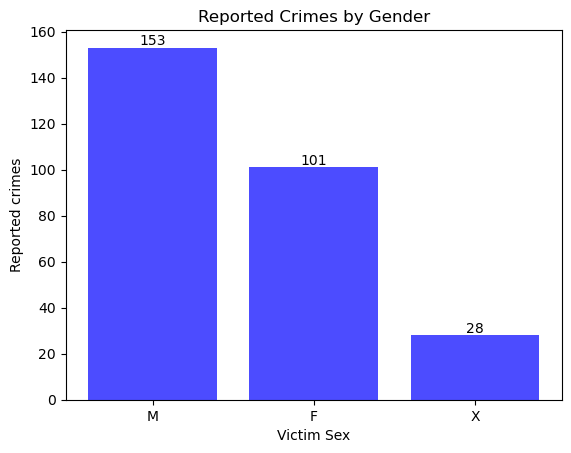

In [3]:
# According to the database documentation we only have 3 possible type of Sex: M - Male, F - Female, X - Unkown
sex_to_keep = ['M','F','X']
sex_df = df[df["Vict Sex"].isin(sex_to_keep)]
sex = sex_df["Vict Sex"].value_counts()

# Plot Reported Crimes by Gender
gender_plot = plt.bar(sex.index,sex.values, color = "blue", alpha=0.7)
plt.title('Reported Crimes by Gender')
plt.xlabel('Victim Sex')
plt.ylabel('Reported crimes')
plt.bar_label(gender_plot)
plt.show()

### b) Profiles most vulnerable by Age

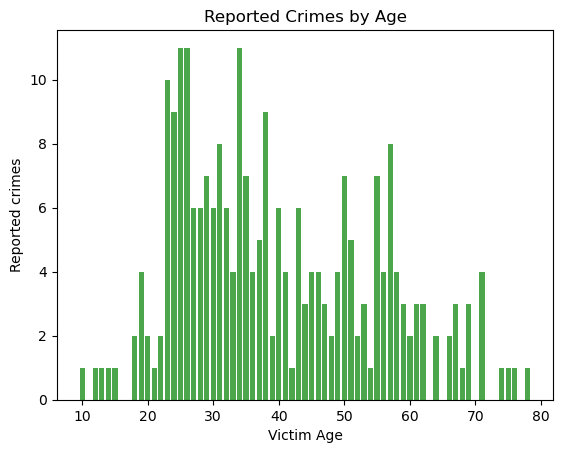

In [4]:
# Drop negative age values
ages_to_drop=[0,-1,-2,-3]
Age_df= df[~df["Vict Age"].isin(ages_to_drop)]
Age = Age_df["Vict Age"].value_counts()

# Plot Reported Crimes by Age
plt.bar(Age.index, Age.values, color = "green", alpha=0.7)
plt.title('Reported Crimes by Age')
plt.xlabel('Victim Age')
plt.ylabel('Reported crimes')
plt.show()

### c) Profiles most vulnerable by Race

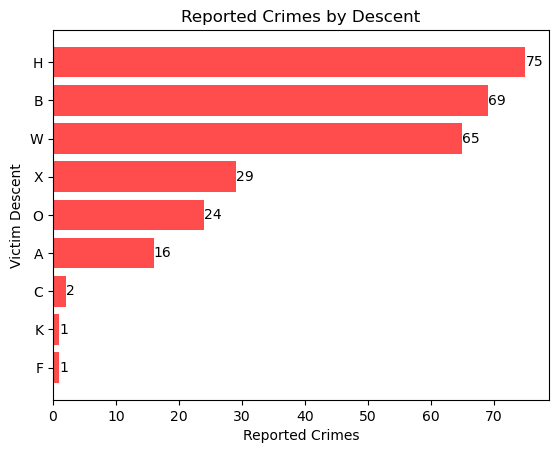

In [5]:
# Find the most popular race of victims
Descent = df["Vict Descent"].value_counts().sort_values()

# Plot Reported Crimes by Victim Descent (Race)
race_plot = plt.barh(Descent.index, Descent.values, color = "red", alpha=0.7)
plt.title('Reported Crimes by Descent')
plt.xlabel('Reported Crimes')
plt.ylabel('Victim Descent')
plt.bar_label(race_plot)
plt.show()

Findings:

# 2) What areas are the most dangerous in LA according to crime reports and the worst hour to be at that area?



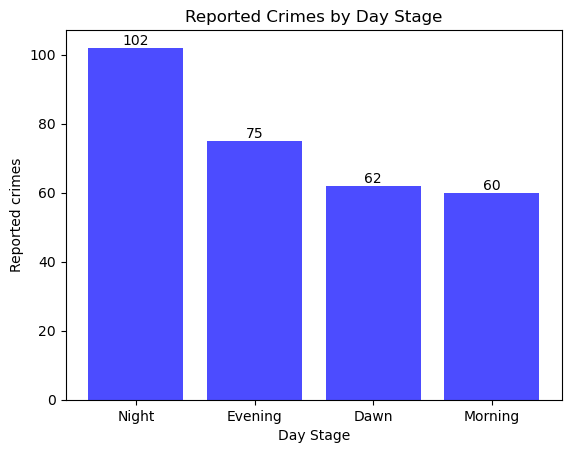

In [6]:
# Categorizing time for simplicity sake. 
# [0 - 6:00am --> Dawn]. [6:00am - 12:00pm --> Morning]. [12:00pm - 18:00pm --> Evening]. [18:00pm - 23:59pm --> Night]
timeBins = [0, 600, 1200, 1800, 2359]
timeNames = ['Dawn', 'Morning', 'Evening', 'Night']

# Create categories using cut method
df['Day Stage'] = pd.cut(df['TIME OCC'], bins= timeBins, labels= timeNames, include_lowest=True)
time_df = df['Day Stage'].value_counts()

# Plot Reported Crimes by Day Stage categories
time_plot = plt.bar(time_df.index, time_df.values, color = "b", alpha=0.7)
plt.title('Reported Crimes by Day Stage')
plt.xlabel('Day Stage')
plt.ylabel('Reported crimes')
plt.bar_label(time_plot)
plt.show()

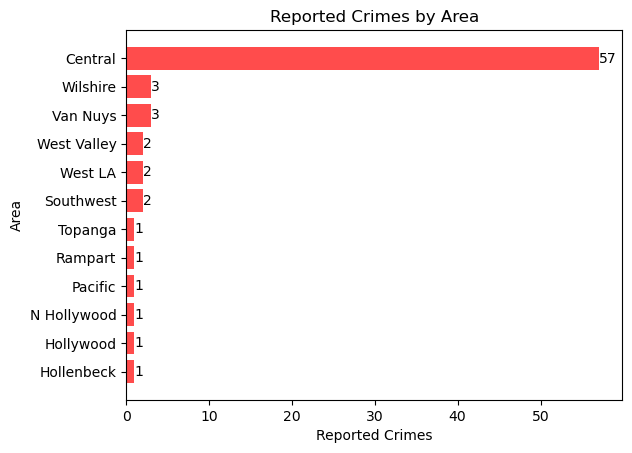

In [8]:
# Find the Worst place (Area) to be at Evening
dayStage_df = df[df['Day Stage'] == 'Evening'].groupby('AREA NAME')['Day Stage'].count().sort_values()

# Plot Reported Crimes at evening
evening_plot = plt.barh(dayStage_df.index, dayStage_df.values, color = "r", alpha=0.7)
plt.title('Reported Crimes by Area')
plt.xlabel('Reported Crimes')
plt.ylabel('Area')
plt.bar_label(evening_plot)
plt.show()

### Use Geoapify to see the most dangerous in LA by Day Stage

In [13]:
# Configure the map plot
map_plot = df.hvplot.points(
    "LON",
    "LAT",
    geo = True,
    tiles = "CartoDark",
    scale = 4,
    color = "Day Stage",
    frame_width = 700,
    frame_height = 500
)

# Display the map
map_plot

c:\Users\IvanC\anaconda3\envs\data_bootcamp\Lib\site-packages\holoviews\core\util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
c:\Users\IvanC\anaconda3\envs\data_bootcamp\Lib\site-packages\holoviews\core\util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
c:\Users\IvanC\anaconda3\envs\data_bootcamp\Lib\site-packages\holoviews\core\util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
c:\Users\IvanC\anaconda3\envs\data_bootcamp\Lib\site-packages\holoviews\core\util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprec

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [LON,LAT]   (Day Stage)

# 3. Linear Regression

##### For this task we will use an API from https://open-meteo.com/ website to retrieve historical weather data. In this case we will use the temperature data to analyze if there is correlation between weather and crimes in LA

In [33]:
# 1. First, convert TIME OCC - Military format - to Hour format. For the API call we need just the hour as an integer
# For example, if TIME OCC is 0752, we will need only 7
df['TIME OCC'] = df['TIME OCC'].astype(str)  
df['TIME OCC'] = df['TIME OCC'].str.zfill(4) 
df['TIME OCC'] = df['TIME OCC'].str[:2] 
df['TIME OCC'] = df['TIME OCC'].astype(int)
df['TIME OCC']

0      22
1       3
2      12
3      17
4       4
       ..
293    11
294    10
295    10
296     9
297    23
Name: TIME OCC, Length: 298, dtype: int32

In [34]:
# 2. Convert timedate format from 'MM/DD/YYYY %h%m' to 'YYYY-MM-DD' (API Request format)
date_formats = df['DATE OCC'].apply(lambda x: re.findall(r'\d{2}/\d{2}/\d{4}', x)[0])
df['DATE OCC'] = date_formats
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], format='%m/%d/%Y')
df['DATE OCC'] = df['DATE OCC'].dt.strftime('%Y-%m-%d')

In [35]:
# 3. Create a copy of the Dataset in order to save its original content and change the size. 
# For now, it takes a sample of the dataset, because of API calls restrictions and computing time.

sample = 300 # Number of rows/crimes to analyze
df = df.iloc[:sample] # If the full data set is desired, remove iloc method, it will take aprox, 125 hours due to the API
df_copy = df.copy()

In [36]:
# 4. Create API Request to retrieve Temperature at an specific time and location. Takes a long time. 
# If you are in a a hurry, change iloc in cell above to 250. this will take 3.5 minutes

# Create a list to save temperatures 
temperatures = []

# Iterate through all dataframe
for index, df_copy in df.iterrows():
    lat = df_copy['LAT']
    lon = df_copy['LON']
    date = df_copy['DATE OCC']
    time = df_copy['TIME OCC']
    
    # Build partial query URL
    query_url = f"https://archive-api.open-meteo.com/v1/archive?latitude={lat}&longitude={lon}&start_date={date}&end_date={date}&hourly=temperature_2m"
    
    response = requests.get(query_url).json()
    temperatures.append(response['hourly']['temperature_2m'][time])

# Add temperatures information to the original dataframe
df['Temperature'] = temperatures

In [38]:
# Show the first 5 rows to verify added temperature information
df.head(5)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Temperature
0,10304468,01/08/2020 00:00,2020-01-08,22,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,Adult Other,624,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978,16.6
1,190101086,01/02/2020 00:00,2020-01-01,3,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,Invest Cont,624,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545,10.1
2,200110444,04/14/2020 12:00:00 AM,2020-02-13,12,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,Adult Arrest,845,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474,5.5
3,191501505,01/01/2020 00:00,2020-01-01,17,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,Invest Cont,745,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019,10.1
4,191921269,01/01/2020 00:00,2020-01-01,4,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,Invest Cont,740,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468,7.7


### a) Is there a correlation between Weather (temperature) and Number of Crimes?

In [39]:
# 1. WEATHER - TEMPERATURE
# Get temperature from dataframe to analyze correlation between temperature and # Crimes
temperature_data = df["Temperature"].round(0).value_counts()

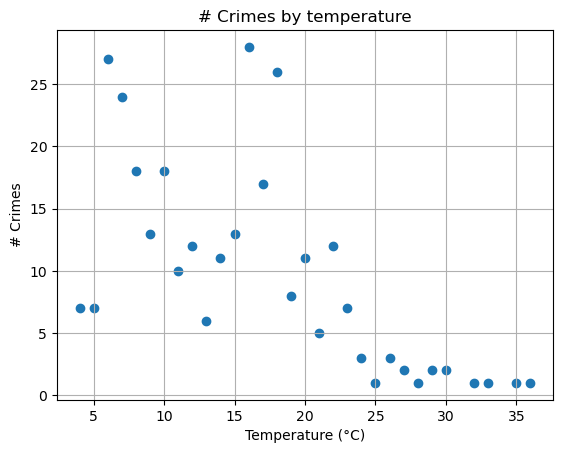

In [40]:
# Build a scatter plot for temperature data
plt.scatter(temperature_data.index, temperature_data.values, marker="o")

# Incorporate the other graph properties
plt.title('# Crimes by temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('# Crimes')
plt.grid()

# Show plot
plt.show()

In [41]:
# Calculate Linear Regression
slope, intercept, r_value, p_value, std_err = linregress(temperature_data.index, temperature_data.values)
print(f'Linear Regression: y = {slope:.2f}x + {intercept:.2f}')
print(f'Correlation is: {r_value:.2f}' )

Linear Regression: y = -0.60x + 21.08
Correlation is: -0.67


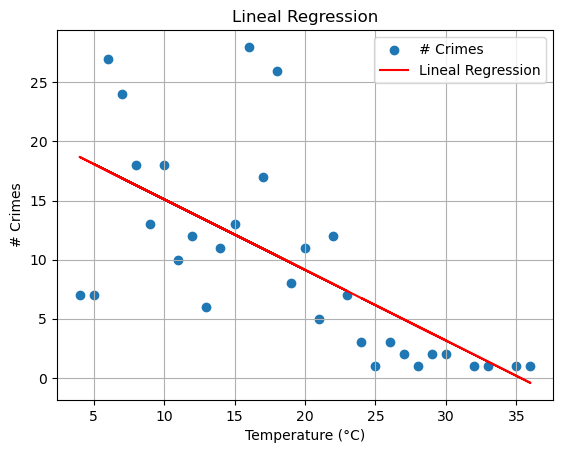

In [42]:
# Plot Linear Regression line
x = temperature_data.index
y = temperature_data.values

# Create Linear Regression line
regression_line = slope * x + intercept

# Plot data and linear regression
plt.scatter(x, y, label='# Crimes')
plt.plot(x, regression_line, color='red', label='Lineal Regression')
plt.xlabel('Temperature (°C)')
plt.ylabel('# Crimes')
plt.legend()
plt.title('Lineal Regression')
plt.grid()
plt.show()

### b) Is there a correlation between Time (Hour) and Number of Crimes?

In [43]:
# 2. TIME - BY HOUR
# Get time from dataframe to analyze correlation between hour and # Crimes
hour_data = df['TIME OCC'].value_counts()

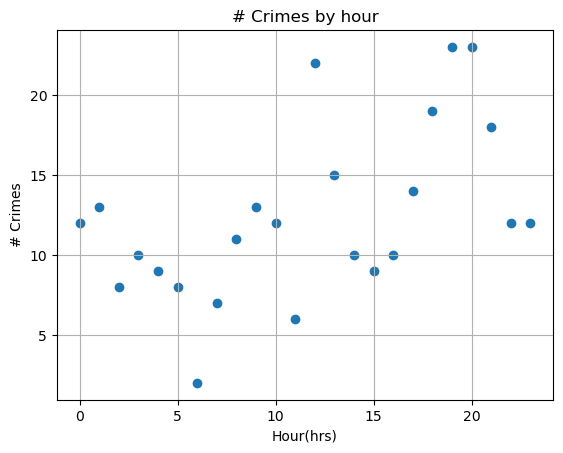

In [44]:
# Build a scatter plot for time data
plt.scatter(hour_data.index, hour_data.values, marker="o")

# Incorporate the other graph properties
plt.title('# Crimes by hour')
plt.xlabel('Hour(hrs)')
plt.ylabel('# Crimes')
plt.grid()

# Show plot
plt.show()

In [45]:
# Calculate Linear Regression
slope, intercept, r_value, p_value, std_err = linregress(hour_data.index, hour_data.values)
print(f'Linear Regression: y = {slope:.2f}x + {intercept:.2f}')
print(f'Correlation is: {r_value:.2f}' )

Linear Regression: y = 0.39x + 7.93
Correlation is: 0.51


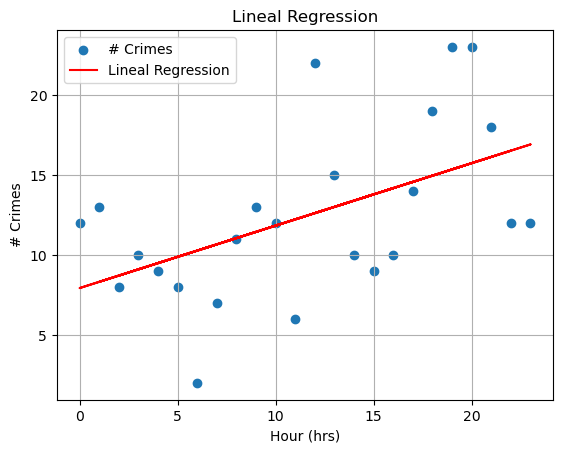

In [46]:
# Plot Linear Regression line
x = hour_data.index
y = hour_data.values

# Create Linear Regression line
regression_line = slope * x + intercept

# Plot data and linear regression
plt.scatter(x, y, label='# Crimes')
plt.plot(x, regression_line, color='red', label='Lineal Regression')
plt.xlabel('Hour (hrs)')
plt.ylabel('# Crimes')
plt.legend()
plt.title('Lineal Regression')
plt.grid()
plt.show()